# Topic Modeling of Historical Organic Periodicals

In [1]:
from __future__ import print_function
import pickle
import subprocess
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

## Learn topic models

In [4]:
# Enable if re-learning
num_features = 2000
num_topics = 20
# cmd = "python -m perysis.extract_topics -input_dir ../documents_processed -output_dir ../models -num_features %d -num_topics %d" % (num_features, num_topics)
# subprocess.check_call(cmd, shell=True)

## Load documents

In [5]:
from perysis.load_documents import load_documents
documents = load_documents("../documents_processed")
periodicals = documents.groupby("Publication")

## Load document-term matrices (DTM)

In [6]:
input_dir = "../models"
# TF
dtm_file = open("%s/dtm_tf.pkl" % input_dir, "rb")
tf_vectorizer = pickle.load(dtm_file)
dtm_tf = pickle.load(dtm_file)
# TF-IDF
dtm_file = open("%s/dtm_tfidf.pkl" % input_dir, "rb")
tfidf_vectorizer = pickle.load(dtm_file)
dtm_tfidf = pickle.load(dtm_file)

## Load learned topic models

### Visualization of top words for each topic

In [7]:
def print_top_words(model, feature_names, n_top_words):
    print("Top words for each topic: \n")
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % (topic_idx + 1)
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

### Visualization of topics for each periodical

In [8]:
def normalize(v):
    """Normalize a non-zero vector"""
    return v / sum(v)

def print_periodicals_distribution(W):
    cols = ["Topic %d" % num for num in range(1, 1 + W.shape[1])]
    rows = periodicals.groups.keys()
    df = pd.DataFrame([], columns=cols, index=rows)
    for name, data in periodicals:
        W_for_periodical = W[data.index, :] # Document-topic matrix subset for periodical
        periodical_topic_distribution = normalize(W_for_periodical.sum(axis=0))
        df.loc[name] = periodical_topic_distribution
    df.T.plot(kind="bar", figsize=(20, 10))
    plt.show()

### Non-negative Matrix Factorization (NMF) model with Frobenius norm

Top words for each topic: 

Topic #1: gm organic soybean say seed corn soy crop said company grain genetically source ingredient feed eu bean email oil consumer wheat testing variety labeling industry european report rice non natural
Topic #2: milk dairy price class milkweed cheese nonfat usda cwt month butter federal dry producer cheddar pound cost cow order january coop supply commodity sale powder nation iii industry higher report
Topic #3: organic crop soil farming agriculture plant research standard broadcaster use study sustainable water pesticide said producer page natural genetically program genetic news national brief livestock garden available conventional manure spring
Topic #4: crop gene engineered plant virus epa resistance genetically insect bacteria scientist herbicide risk cotton weed control pest agriculture toxin field biotechnology vaccine usda squash company environmental organism genetic wild agency
Topic #5: seed variety plant patent hybrid broadcaster breeder see

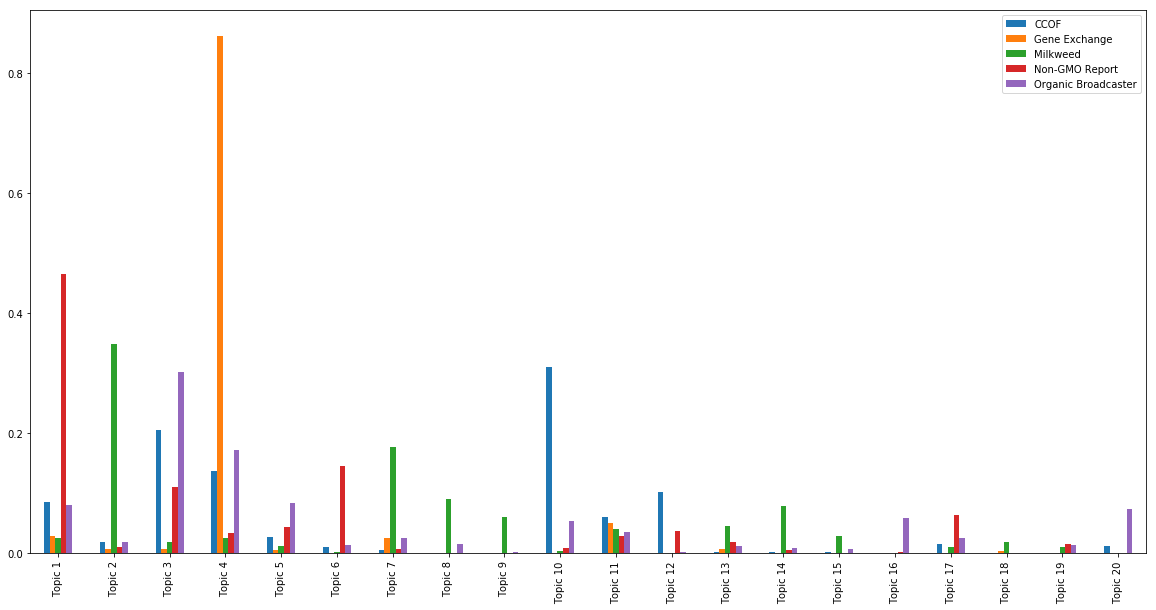

In [9]:
model_file = open("%s/nmf_frobenius.pkl" % input_dir, "rb")
(model, W, T) = pickle.load(model_file)
# print([idx for idx, _ in enumerate(model.components_) if model.components_[idx].sum() < 1e-5])
print_top_words(model, tfidf_vectorizer.get_feature_names(), 30)
print_periodicals_distribution(W)
vis = pyLDAvis.sklearn.prepare(model, dtm_tfidf, tfidf_vectorizer)
pyLDAvis.display(vis)

### NMF model with Kullback-Leibler (KL) divergence

Top words for each topic: 

Topic #1: able address addition absence advantage milling area minnesota bean best better natural national import believe lion ingredient marketing missouri major nearly nature american institute planted based nation agency adopt look
Topic #2: milk way milkweed cheese week western cheddar weather exchange weekly change example washington summer marketer virtually processor supply madison nonfat meeting set sup na month foreign major volume demand synthetic
Topic #3: organic volume broadcaster brief farming environmental plant genetically soil used act number research change spring business engineered resource page sure control pesticide newsletter allowed crop pest animal agricultural early insect
Topic #4: academy director newsletter management page organism office approved earlier organization nation biotechnology paper president concern executive force modified better reach calling blood document avoid called european stated agriculture end bacteria
Topi

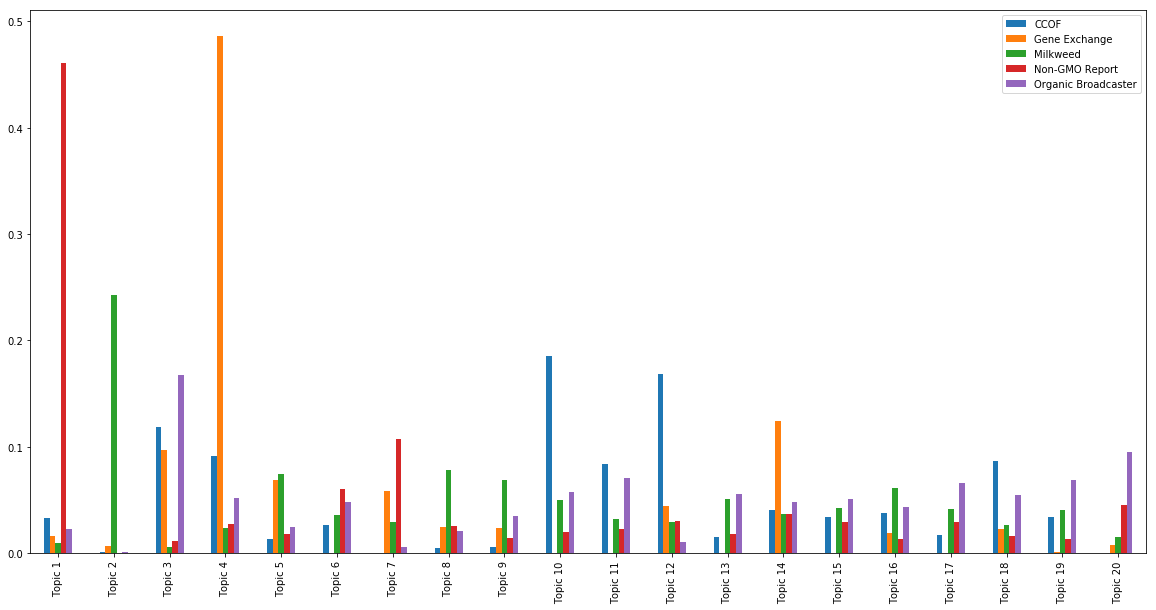

In [10]:
model_file = open("%s/nmf_kl.pkl" % input_dir, "rb")
(model, W, T) = pickle.load(model_file)
# print([idx for idx, _ in enumerate(model.components_) if model.components_[idx].sum() < 1e-5])
print_top_words(model, tfidf_vectorizer.get_feature_names(), 30)
print_periodicals_distribution(W)
vis = pyLDAvis.sklearn.prepare(model, dtm_tfidf, tfidf_vectorizer)
pyLDAvis.display(vis)

### Latent Dirichlet Allocation

Top words for each topic: 

Topic #1: fda milk cow human hormone dairy growth animal health research safety test data level drug cancer bovine study treated consumer claim science public use blood article labeling group increased processor
Topic #2: milk dairy price usda class milkweed cow producer cost federal dry cheese alfalfa pound heifer nation month order supply nonfat global january cheddar sale cwt dean million iii protein import
Topic #3: percent syrup cost gm soy wheat say premium debate higher corn soybean austria safety protein government ip house according want sugar european price sweetener quality process brazil high crop country
Topic #4: ge crop genetically engineered labeling biotech california organic page said soil regulation contamination wheat country report modified variety world grow export require ballot mexico import nation eu government usda press
Topic #5: creamery dairy butter testing consumer feed grain april test industry equipment meeting corn water mont

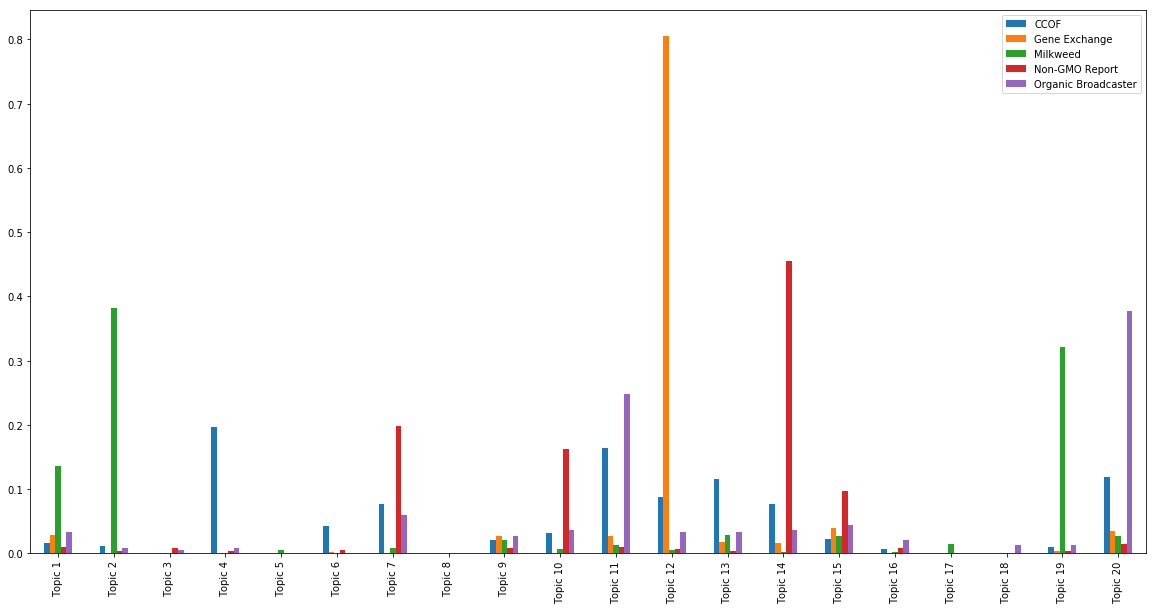

In [11]:
model_file = open("%s/lda_tf.pkl" % input_dir, "rb")
(model, W, T) = pickle.load(model_file)
print_top_words(model, tf_vectorizer.get_feature_names(), 30)
print_periodicals_distribution(W)
vis = pyLDAvis.sklearn.prepare(model, dtm_tf, tf_vectorizer)
pyLDAvis.display(vis)